In [1]:
!pip install jieba

In [6]:
with open('./data/nplm/xiyouji.txt', 'r', encoding='utf-16') as f:
    txt = str(f.read())

In [23]:
txt[:1000]

'《西游记》（精校版全本）作者：吴承恩\n \n\n内容简介：\n\n\u3000\u3000《西游记》全书分为三大部分，前七回是全书之帽，一边安排孙悟空出场，交代清楚其出身、师承、能耐、性情；一边通过孙悟空在天、地、冥、水四界穿越，描绘四界风貌，建立一个三维、四境界立体思维活动空间。八至十二回写唐僧出世、唐太宗入冥故事，交待去西天取经缘由。十三至一百回写孙悟空、猪八戒、沙和尚保护唐僧西天取经，沿途降妖伏魔，历经九九八十一难，到达西天，取得真经，修成正果的故事。以无量无数方便、种种因缘、譬喻言辞，释佛法渊博。\n\n    《西游记》是我国古代最负盛名的神魔小说。作者通过唐僧师徒四人西天取经的故事，寄托了对社会一实的批判。其中孙悟空的形象更是我国古典小说不楞多得的艺术形象之一，它的叛逆性格和反抗精神，尤为广大读者所喜爱。\n\n\u3000\u3000《西游记》的语言以明代流行的南方官话为基础，与现代汉语差别较大。专家学者在翻译时昼保持原著的语方风格，并进行了再加工，使用权它更适合小学以上文化程度的读者阅读。\n\n\n第一回 灵根育孕源流出 心性修持大道生\n\n\u3000\u3000诗曰：\n\n\u3000\u3000混沌未分天地乱，茫茫渺渺无人见。自从盘古破鸿蒙，开辟从兹清浊辨。\n\n\u3000\u3000覆载群生仰至仁，发明万物皆成善。欲知造化会元功，须看西游释厄传。\n\n\u3000\u3000盖闻天地之数，有十二万九千六百岁为一元。将一元分为十二会，乃子、丑、寅、卯、辰、巳、午、未、申、酉、戌、亥之十二支也。每会该一万八百岁。且就一日而论：子时得阳气，而丑则鸡鸣；寅不通光，而卯则日出；辰时食后，而巳则挨排；日午天中，而未则西蹉；申时晡而日落酉，戌黄昏而人定亥。譬于大数，若到戌会之终，则天地昏缯而万物否矣。\n\n\u3000\u3000再去五千四百岁，交亥会之初，则当黑暗，而两间人物俱无矣，故曰混沌。又五千四百岁，亥会将终，贞下起元，近子之会，而复逐渐开明。邵康节曰：“冬至子之半，天心无改移。一阳初动处，万物未生时。”到此天始有根。\n\n\u3000\u3000再五千四百岁，正当子会，轻清上腾，有日有月有星有辰。日月星辰，谓之四象。故曰天开于子。又经五千四百岁，子会将终，近丑之会，而逐渐坚实。《易》曰：“大哉乾元！至哉坤元！万物资生，乃顺承天

In [8]:
import jieba

temp = jieba.lcut(txt)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\moutsea\AppData\Local\Temp\jieba.cache
Loading model cost 0.272 seconds.
Prefix dict has been built successfully.


In [9]:
temp[:30]

['《',
 '西游记',
 '》',
 '（',
 '精校',
 '版',
 '全本',
 '）',
 '作者',
 '：',
 '吴承恩',
 '\n',
 ' ',
 '\n',
 '\n',
 '内容简介',
 '：',
 '\n',
 '\n',
 '\u3000',
 '\u3000',
 '《',
 '西游记',
 '》',
 '全书',
 '分为',
 '三',
 '大部分',
 '，',
 '前七回']

In [10]:
import string

punctuation = set(string.punctuation)
# 添加中文常见标点
punctuation.update(['，', '。', '！', '？', '、', '；', '：', '“', '”', '‘', '’', '（', '）', '《', '》', '……', '—', '\u3000'])

def clean_text(text):
    # 使用 jieba 进行分词
    words = jieba.lcut(text)
    # 过滤掉标点符号和空白字符
    filtered_words = [word for word in words if word not in punctuation and not word.isspace()]
    return filtered_words

words = clean_text(txt)

In [11]:
words[:10]

['西游记', '精校', '版', '全本', '作者', '吴承恩', '内容简介', '西游记', '全书', '分为']

In [12]:
vocab = set(words)
print(len(vocab))

49212


In [13]:
trigrams = [([words[i], words[i + 1]], words[i + 2]) for i in range(len(words) - 2)]

In [43]:
trigrams[:10]

[(['西游记', '精校'], '版'),
 (['精校', '版'], '全本'),
 (['版', '全本'], '作者'),
 (['全本', '作者'], '吴承恩'),
 (['作者', '吴承恩'], '内容简介'),
 (['吴承恩', '内容简介'], '西游记'),
 (['内容简介', '西游记'], '全书'),
 (['西游记', '全书'], '分为'),
 (['全书', '分为'], '三'),
 (['分为', '三'], '大部分')]

In [14]:
word_to_idx = {} 
idx_to_word = {}
ids = 0

for w in words:
    cnt = word_to_idx.get(w, [ids, 0])
    if cnt[1] == 0:
        ids += 1
    cnt[1] += 1
    word_to_idx[w] = cnt
    idx_to_word[ids] = w

In [40]:
list(word_to_idx.items())[: 30]

[('西游记', [0, 5]),
 ('精校', [1, 1]),
 ('版', [2, 1]),
 ('全本', [3, 1]),
 ('作者', [4, 2]),
 ('吴承恩', [5, 1]),
 ('内容简介', [6, 1]),
 ('全书', [7, 2]),
 ('分为', [8, 5]),
 ('三', [9, 153]),
 ('大部分', [10, 1]),
 ('前七回', [11, 1]),
 ('是', [12, 4072]),
 ('之帽', [13, 1]),
 ('一边', [14, 25]),
 ('安排', [15, 114]),
 ('孙悟空', [16, 131]),
 ('出场', [17, 1]),
 ('交代', [18, 1]),
 ('清楚', [19, 1]),
 ('其', [20, 23]),
 ('出身', [21, 19]),
 ('师承', [22, 1]),
 ('能耐', [23, 2]),
 ('性情', [24, 7]),
 ('通过', [25, 2]),
 ('在', [26, 2782]),
 ('天', [27, 103]),
 ('地', [28, 146]),
 ('冥', [29, 4])]

In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import random
from torch.utils.data import Dataset, DataLoader

indexed_trigrams = [([word_to_idx[words[i]][0], word_to_idx[words[i + 1]][0]], word_to_idx[words[i + 2]][0]) for i in range(len(words) - 2)]

def get_device():
    device = torch.device('cpu')
    if torch.backends.mps.is_built():
        device = torch.device('mps')
    elif torch.cuda.is_available():
        device = torch.device('cuda')
    else:
        device = torch.device('cpu')
    return device

device = get_device()

class NGramDataset(Dataset):
    def __init__(self, trigram_data):
        self.trigrams = trigram_data

    def __len__(self):
        return len(self.trigrams)

    def __getitem__(self, idx):
        context, target = self.trigrams[idx]
        context_idxs = torch.tensor(context, dtype=torch.long).to(device)
        target_idx = torch.tensor([target], dtype=torch.long).to(device)
        return context_idxs, target_idx

In [3]:


class NGram(nn.Module):

    def __init__(self, vocab_size, embedding_dim, context_size):
        super(NGram, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)  #嵌入层
        self.linear1 = nn.Linear(context_size * embedding_dim, 128) #线性层
        self.linear2 = nn.Linear(128, vocab_size)

    def forward(self, inputs):
        embeds = self.embeddings(inputs)
        embeds = embeds.view((embeds.size(0), -1))

        out = self.linear1(embeds)
        out = F.relu(out)
        out = self.linear2(out)
        #此时out的尺寸为：1*vocab_size
        log_probs = F.log_softmax(out, dim = 1)
        return log_probs
    
    def extract(self, inputs):
        embeds = self.embeddings(inputs)
        return embeds

In [211]:
import os

model = NGram(len(vocab), 16, 2)

model_path = os.path.join('../resource/word2vec', 'word2vec.pt')

model.load_state_dict(torch.load(model_path))
model.to(device)

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

epochs = 500

batch_size = 64

dataset = NGramDataset(indexed_trigrams)

data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

for epoch in range(epochs):
    running_loss = 0.0
    total = 0

    for X, labels in data_loader:
        outputs = model(X)

        optimizer.zero_grad()
        loss = criterion(outputs, labels.squeeze())

        loss.backward()
        optimizer.step()

        running_loss += loss.cpu().item() * labels.size(0)
        total += labels.size(0)   

    print(f'epoch: {epoch}, loss: {running_loss / total}')

torch.save(model.state_dict(), model_path)


epoch: 0, loss: 4.982596864338363
epoch: 1, loss: 4.980987670233582
epoch: 2, loss: 4.979401460704315
epoch: 3, loss: 4.9775907216504445
epoch: 4, loss: 4.97612097819087
epoch: 5, loss: 4.974484303541887
epoch: 6, loss: 4.973050203991104
epoch: 7, loss: 4.971323627964552
epoch: 8, loss: 4.96991115635494
epoch: 9, loss: 4.968000287315251
epoch: 10, loss: 4.966566837598481
epoch: 11, loss: 4.9649718650929024
epoch: 12, loss: 4.963502813092367
epoch: 13, loss: 4.96192155363552
epoch: 14, loss: 4.960130049815247
epoch: 15, loss: 4.958707761157278
epoch: 16, loss: 4.957335352638008
epoch: 17, loss: 4.955869577728479
epoch: 18, loss: 4.954157846328232
epoch: 19, loss: 4.952468417162296
epoch: 20, loss: 4.950952375926907
epoch: 21, loss: 4.949577021549492
epoch: 22, loss: 4.947947202228857
epoch: 23, loss: 4.9464717128316815
epoch: 24, loss: 4.944911909571129
epoch: 25, loss: 4.943340380849014
epoch: 26, loss: 4.941851358047681
epoch: 27, loss: 4.940286696468322
epoch: 28, loss: 4.93872105059

In [17]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib
import os

model = NGram(len(vocab), 16, 2)

model_path = os.path.join('../resource/word2vec', 'word2vec.pt')

model.load_state_dict(torch.load(model_path))
model.to(device)

vec = model.extract(torch.tensor([v[0] for v in word_to_idx.values()], dtype = torch.long).to(device))
vec = vec.cpu().data.numpy()

# 利用PCA算法进行降维
X_reduced = PCA(n_components=2).fit_transform(vec)

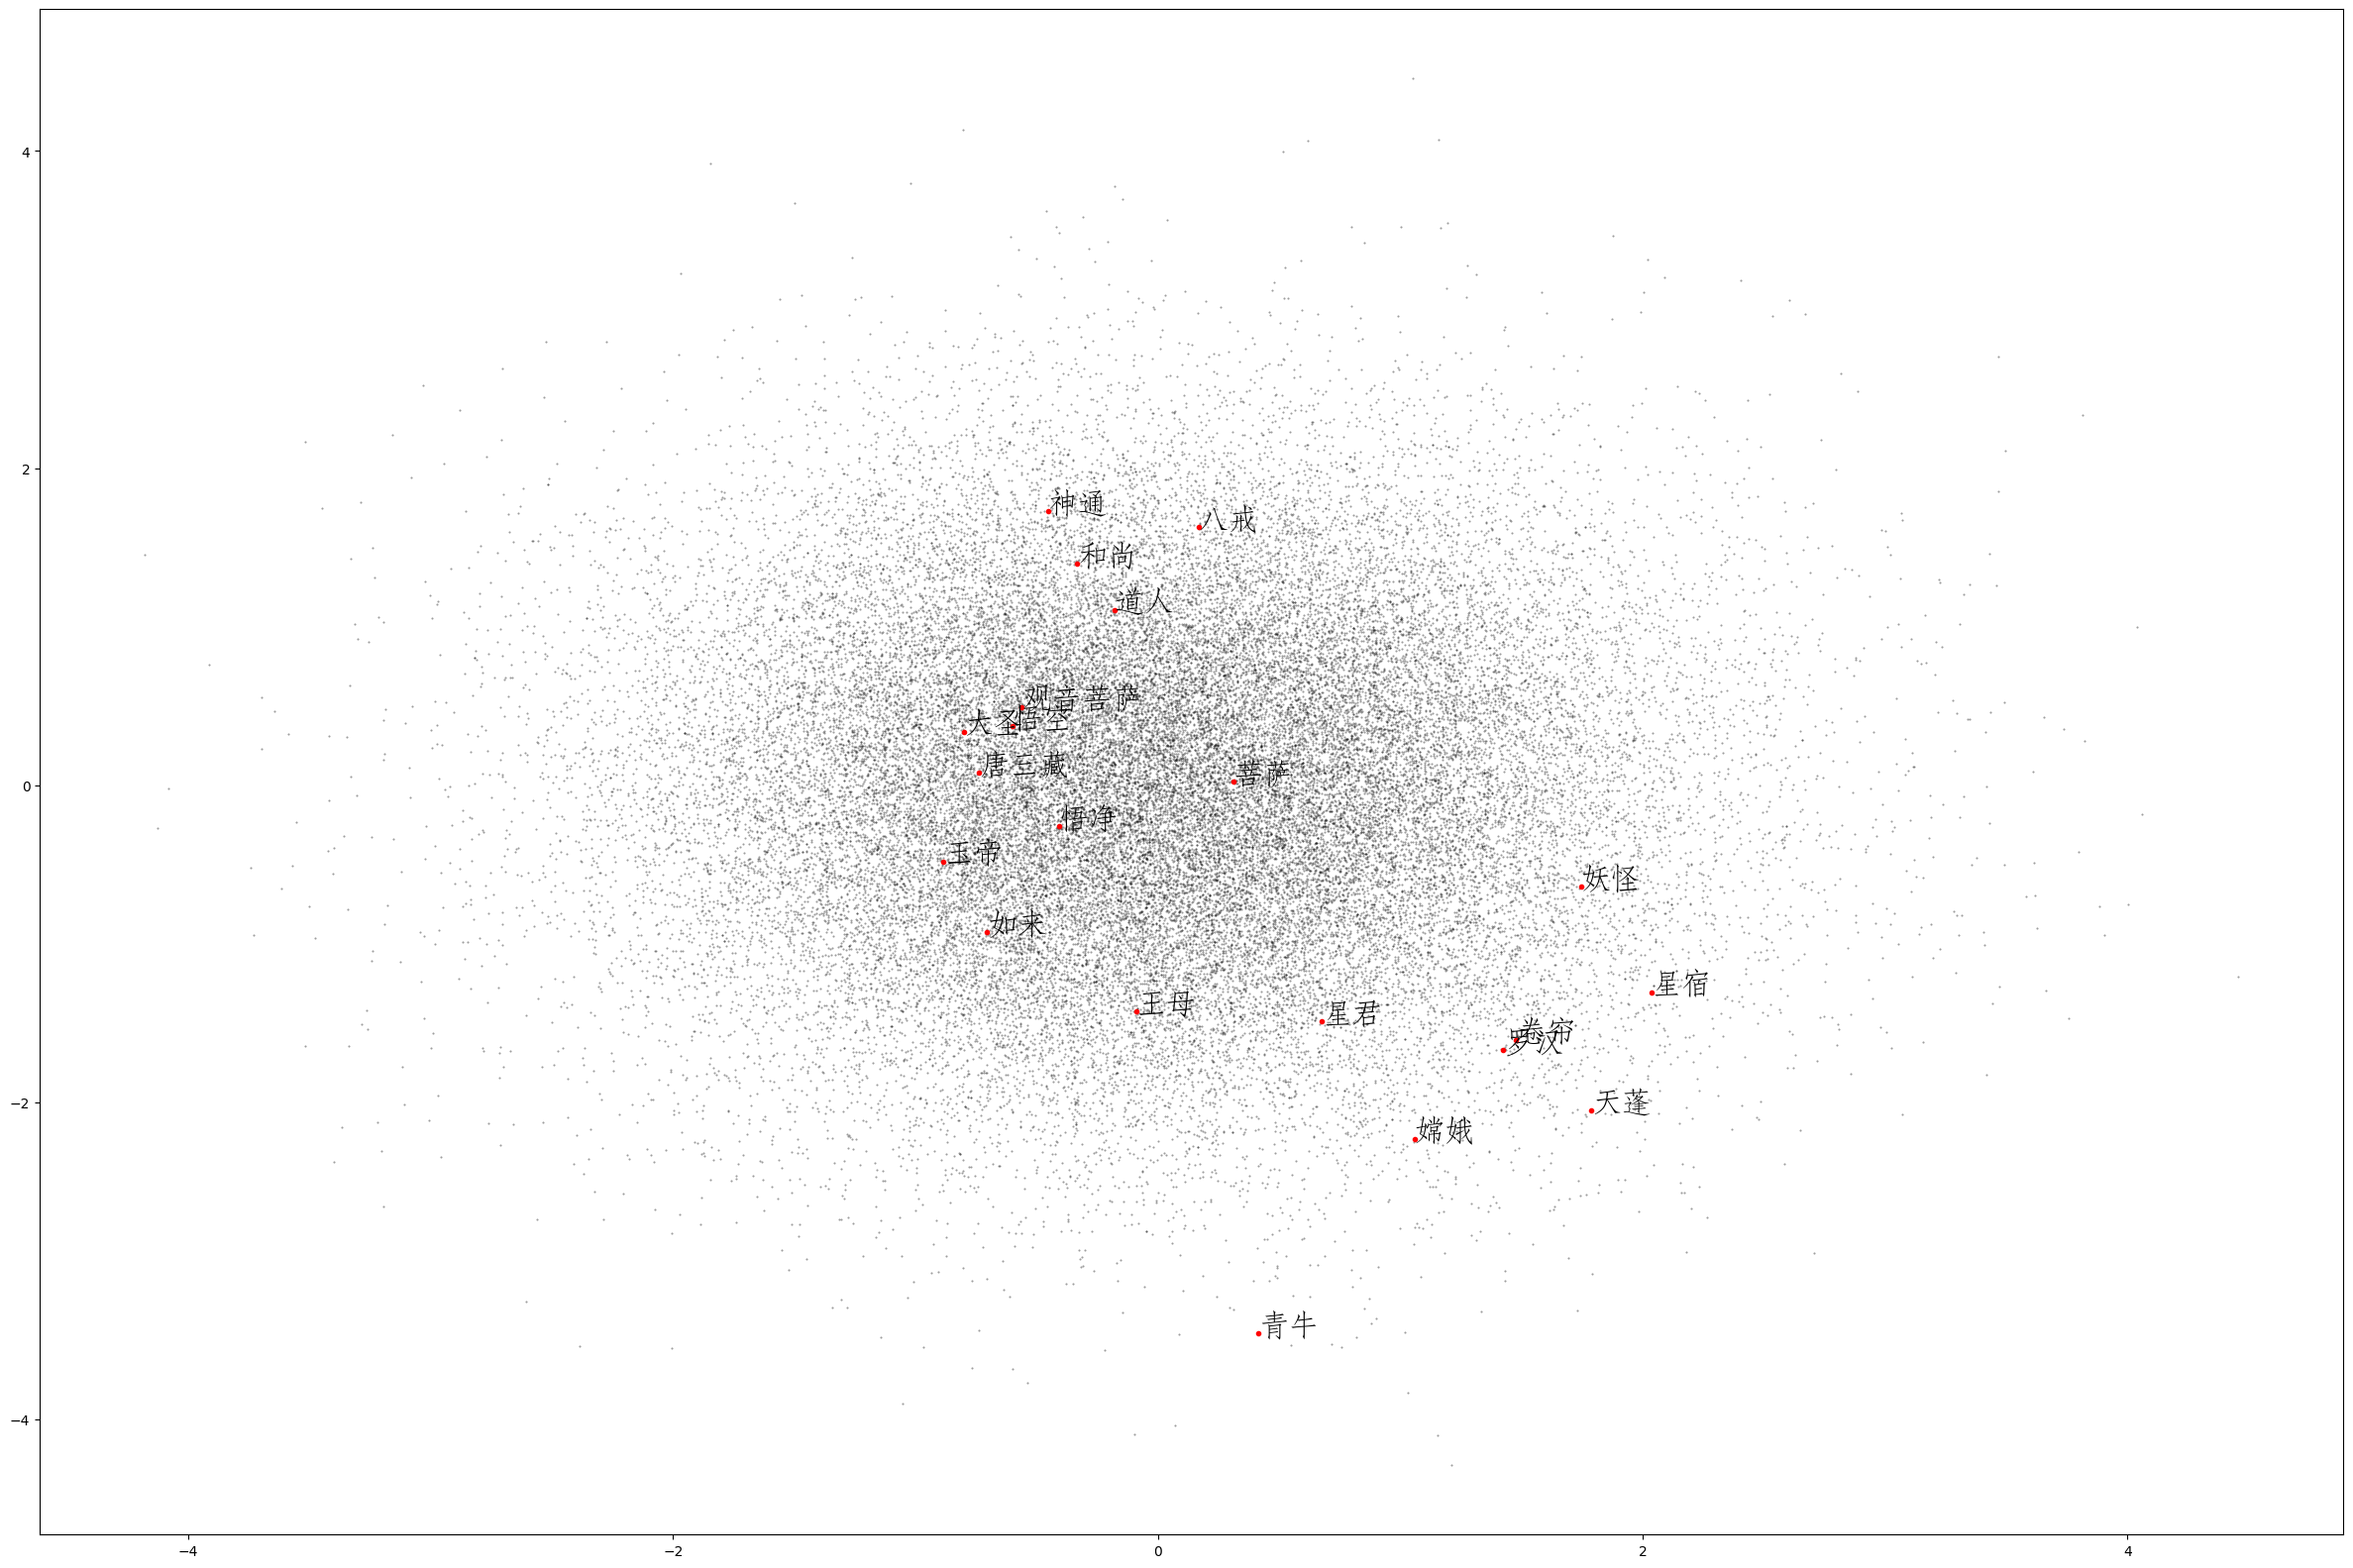

In [273]:
fig = plt.figure(figsize = (30, 20))
ax = fig.gca()
ax.set_facecolor('white')
ax.plot(X_reduced[:, 0], X_reduced[:, 1], '.', markersize = 1, alpha = 0.4, color = 'black')

words = ['悟空', '八戒', '悟净', '观音菩萨', '如来', '罗汉', '玉帝', '大圣','唐三藏', '和尚', '道人', '星君', '青牛', '王母', '神通', '星宿', '菩萨', '妖怪', '嫦娥', '天蓬', '卷帘']

zhfont1 = matplotlib.font_manager.FontProperties(fname='./data/nplm/HuaWenFangSong-1.ttf', size=22)

for w in words:
    if w in word_to_idx:
        ind = word_to_idx[w][0]
        xy = X_reduced[ind]
        plt.plot(xy[0], xy[1], '.', alpha =1, color = 'red')
        plt.text(xy[0], xy[1], w, fontproperties = zhfont1, alpha = 1, color = 'black')
        
plt.show()

In [23]:
import numpy as np

# 定义计算cosine相似度的函数
def cos_similarity(vec1, vec2):
    
    norm1 = np.linalg.norm(vec1)
    norm2 = np.linalg.norm(vec2)
    norm = norm1 * norm2
    dot = np.dot(vec1, vec2)
    result = dot / norm if norm > 0 else 0
    return result
    
# 在所有的词向量中寻找到与目标词（word）相近的向量，并按相似度进行排列
def find_most_similar(word, vectors, word_idx, k):
    vector = vectors[word_to_idx[word][0]]
    simi = [[cos_similarity(vector, vectors[num]), key] for num, key in enumerate(word_idx.keys())]
    sort = sorted(simi)[::-1]
    words = [i[1] for i in sort]
    return words[: k]


In [21]:
find_most_similar('三藏', vec, word_to_idx, 10)

['三藏', '雪积', '绾', '唐僧', '空本', '街心', '左进', '悬壁', '无夫', '起上']

In [35]:
find_most_similar('大圣', vec, word_to_idx, 10)

['大圣', '怀仇', '蓝桥', '日滔星', '尤宜', '秋江', '右手掌', '三座', '力奏', '阴阳家']

In [24]:
find_most_similar('八戒', vec, word_to_idx, 10)

['八戒', '巧巧', '渔翁', '蛮夷', '裂蛇腹', '桃核', '本仙', '毕谢', '喷出去', '见责']